In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import root
import yaml
pd.set_option('display.max_rows', None)

In [2]:
#lowest
# res = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/best_run_beis_comparison/demand_none-carbon_9272845799999999-datetime_2020-02-10_16-12-05-capacity_52152.csv')

#highest
# res = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/best_run_beis_comparison/demand_none-carbon_213922228-datetime_2020-02-10_16-47-48-capacity_52152.csv')

#flat
res = pd.read_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/best_run_beis_comparison/demand_none-carbon_1923411299-datetime_2020-02-10_17-26-03-capacity_52152.csv')

res['year'] = np.repeat(list(range(int(len(res.index)/8))), 8)
try:
    result = res.drop('hourly_accepted_bids', axis=1)
except:
    result = res.copy()
    
result.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,year
0,0,335947.68,210716.70,23300.555309,29579.745224,3154.551065,165604.866874,10709.770,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,1.302085e+10,90.160219,1186.893032,0
1,1,254824.38,173096.11,23464.752699,29595.668288,3122.211992,165604.866874,3333.405,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,7.968657e+09,55.893875,921.443863,0
2,2,337483.02,212113.42,21601.843042,29224.130128,1658.945670,165604.866874,12134.700,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,1.713355e+10,90.267117,1196.066228,0
3,3,343030.80,232252.89,23278.203832,29656.706700,3188.160175,165604.866874,12933.010,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,3.402656e+10,108.489633,1253.840754,0
4,4,151735.86,130148.55,22191.845222,29595.668288,3116.600720,148459.399850,0.000,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,2.071173e+10,43.815910,599.361180,0


In [3]:
result

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,year
0,0,335947.68,210716.70,23300.555309,29579.745224,3154.551065,165604.866874,10709.770,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.112160,1.302085e+10,90.160219,1186.893032,0
1,1,254824.38,173096.11,23464.752699,29595.668288,3122.211992,165604.866874,3333.405,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.112160,7.968657e+09,55.893875,921.443863,0
2,2,337483.02,212113.42,21601.843042,29224.130128,1658.945670,165604.866874,12134.700,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.112160,1.713355e+10,90.267117,1196.066228,0
3,3,343030.80,232252.89,23278.203832,29656.706700,3188.160175,165604.866874,12933.010,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.112160,3.402656e+10,108.489633,1253.840754,0
4,4,151735.86,130148.55,22191.845222,29595.668288,3116.600720,148459.399850,0.000,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.112160,2.071173e+10,43.815910,599.361180,0
5,5,341194.92,236598.68,23464.752699,29595.668288,3122.286319,165604.866874,11950.400,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.112160,3.626812e+10,91.168287,1257.769196,0
6,6,200199.12,91239.47,25582.054004,33535.977227,4482.611414,135545.015402,0.000,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.112160,1.609429e+10,45.794244,618.313312,0
7,7,179332.14,153226.82,31310.357158,38306.247757,7415.260584,145936.229874,0.000,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.112160,-8.377852e+09,44.124287,706.379151,0
8,8,276471.52,199410.48,22284.052966,29104.336296,476200.373817,153594.931610,2599.600,0,31912.0,...,8756.1,6983.8,108769.8,9361.0,670.0,191.883190,-3.590379e+10,88.998403,1018.871877,1
9,9,176896.28,173371.13,22229.656986,28822.736223,470754.455093,156093.039424,649.900,0,31912.0,...,8756.1,6983.8,108769.8,9361.0,670.0,191.883190,-4.245480e+10,54.942542,748.202908,1


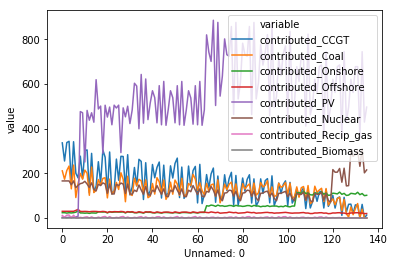

In [4]:

result_filtered = result.filter(regex='contributed_|year|Unnamed: 0')
result_long = result_filtered.melt(id_vars=['Unnamed: 0','year'])
result_long.head()

result_long.value=result_long.value/1000

sns.lineplot(data=result_long, x='Unnamed: 0', hue='variable', y='value')

In [5]:
def get_mix(df):
#     df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['actual'] / df['actual'].sum()
    return df


def get_projection_difference_sum(results_df, year_to_compare=None):
    ROOT_DIR = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run'
    
    contributed_results = results_df.filter(regex='contributed_')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24

    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
    # print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split

#     results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
#     results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
#     results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
#     results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
#                                              axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

    if year_to_compare is not None:
        # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
        results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])

    joined = results_wa_long.rename(columns={'value': 'actual'})
    joined = joined.groupby("year").apply(get_mix)
    joined = joined.reset_index()
    return joined

In [6]:
per_year_dat = get_projection_difference_sum(result)

per_year_long = per_year_dat.melt(['year','fuel_type'])
per_year_long.head()

,year,fuel_type,variable,value
0,2018,ccgt,actual,10361.628240
1,2019,ccgt,actual,8147.559326
2,2020,ccgt,actual,7668.670993
3,2021,ccgt,actual,7781.430379
4,2022,ccgt,actual,6830.960658


   year fuel_type        actual  simulated_perc
0  2018      ccgt  10361.628240        0.389860
1  2019      ccgt   8147.559326        0.191506
2  2020      ccgt   7668.670993        0.190370
3  2021      ccgt   7781.430379        0.194645
4  2022      ccgt   6830.960658        0.166678


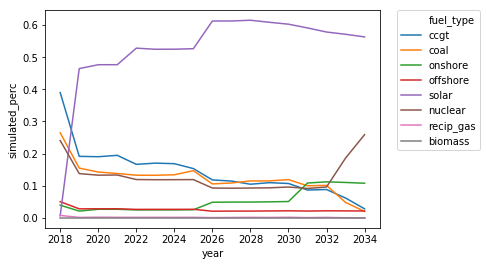

In [7]:
print(per_year_dat.head())
sns.lineplot(data=per_year_dat, x='year', hue='fuel_type', y='simulated_perc')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

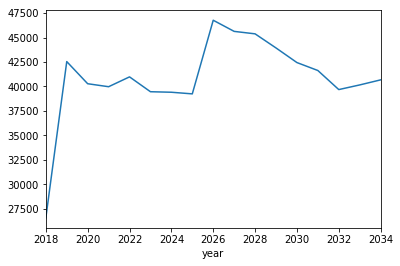

In [8]:
total_demand = per_year_dat.groupby('year')['actual'].sum()
total_demand.plot()
# sns.lineplot(data=per_year_dat, x='year', hue='fuel_type', y='total_demand')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

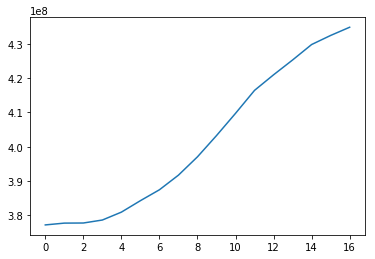

In [9]:
electricity_ktoe = [24822.84204, 24470.32991, 24301.10466, 24288.25851, 24438.20398, 24717.02662, 24995.8011, 25361.32776, 25813.71342, 26342.63171, 26893.41806, 27471.23698, 27867.29557, 28262.51807, 28754.44771, 29191.80642, 29648.75735]
renewables_ktoe = [7609.872531, 8007.503459, 8179.451416, 8267.036507, 8314.81648, 8323.254324, 8317.588187, 8318.702017, 8325.651362, 8328.676807, 8335.161717, 8333.378709, 8327.276614, 8303.48562, 8198.764019, 7988.909411, 7737.627294]

final_consumption = [(elec+renew) * 11630 for elec, renew in zip(electricity_ktoe, renewables_ktoe)]
plt.plot(final_consumption)


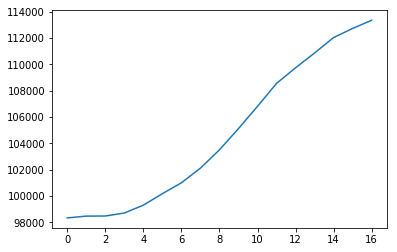

In [10]:
multi_year_data_scaled = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/elecsim/data/processed/multi_day_data/4_medoids_scaled.csv')


# BEIS Final Electricity Consumption
electricity_ktoe = [24822.84204, 24470.32991, 24301.10466, 24288.25851, 24438.20398, 24717.02662, 24995.8011, 25361.32776, 25813.71342, 26342.63171, 26893.41806, 27471.23698, 27867.29557, 28262.51807, 28754.44771, 29191.80642, 29648.75735]
renewables_ktoe = [7609.872531, 8007.503459, 8179.451416, 8267.036507, 8314.81648, 8323.254324, 8317.588187, 8318.702017, 8325.651362, 8328.676807, 8335.161717, 8333.378709, 8327.276614, 8303.48562, 8198.764019, 7988.909411, 7737.627294]

final_consumption = [(elec+renew) * 11630 for elec, renew in zip(electricity_ktoe, renewables_ktoe)]

def get_difference(scaler, df, required_mwh):
    load_dat = df[df.data_type=='load']
    load_total = load_dat.capacity_factor * scaler
    return load_total.sum() - required_mwh

demand_sizes = [root(fun=get_difference, x0=50000, args=(multi_year_data_scaled, consumption)).x for consumption in final_consumption]
plt.plot(demand_sizes)

In [11]:
result.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,year
0,0,335947.68,210716.70,23300.555309,29579.745224,3154.551065,165604.866874,10709.770,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,1.302085e+10,90.160219,1186.893032,0
1,1,254824.38,173096.11,23464.752699,29595.668288,3122.211992,165604.866874,3333.405,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,7.968657e+09,55.893875,921.443863,0
2,2,337483.02,212113.42,21601.843042,29224.130128,1658.945670,165604.866874,12134.700,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,1.713355e+10,90.267117,1196.066228,0
3,3,343030.80,232252.89,23278.203832,29656.706700,3188.160175,165604.866874,12933.010,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,3.402656e+10,108.489633,1253.840754,0
4,4,151735.86,130148.55,22191.845222,29595.668288,3116.600720,148459.399850,0.000,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,192.11216,2.071173e+10,43.815910,599.361180,0


(0, 192.29533588000004)

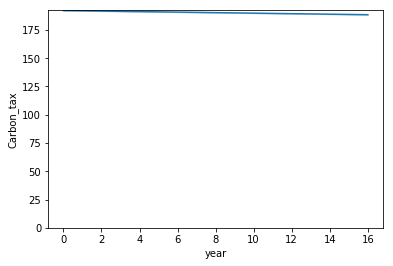

In [12]:
sns.lineplot(data=result,x='year',y='Carbon_tax')
plt.ylim(0)

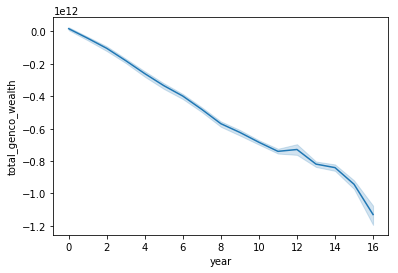

In [13]:
sns.lineplot(data=result,x='year',y='total_genco_wealth')

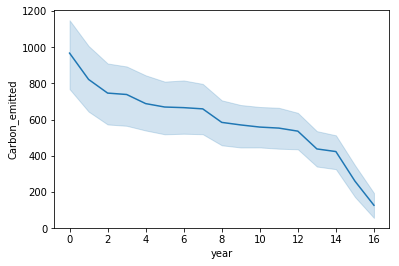

In [14]:
sns.lineplot(data=result,x='year',y='Carbon_emitted')

(0, 95.77457457491106)

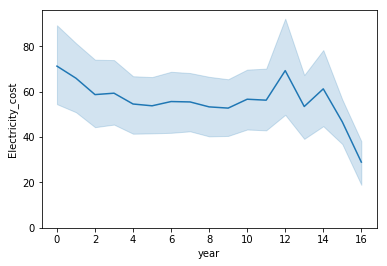

In [15]:
sns.lineplot(data=result,x='year',y='Electricity_cost')
plt.ylim(0)

In [16]:
# hourly_dat_total = []
# for row in res[res.year==16].iterrows():
#     hourly_dat = pd.DataFrame(yaml.load(row[1]['hourly_accepted_bids']))
#     hourly_dat['id'] = row[0]
#     hourly_dat_total.append(hourly_dat)
    
# hourly_dat_total_df = pd.concat(hourly_dat_total)

In [17]:
# hourly_dat_total_df.head()

In [18]:
# hourly_dat_total_df[hourly_dat_total_df.id==128]

# Electricity Bounds

In [19]:
def plot_multiple_electricity_mixes(folder):
    path = "/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/electricity_mix_bounds/{}/".format(folder)
    all_files = glob.glob(path + "/*.csv")
    results = []
    

    for i, filename in enumerate(all_files):
        result = pd.read_csv(filename, index_col=None, header=0)
        if i == 1:
            sns.lineplot(data=result[::8], x='Unnamed: 0', y='Carbon_tax')
            plt.ylim([0,500])
            plt.show()
        per_year_dat = get_projection_difference_sum(result)
        results.append(per_year_dat)
        

    one_df = pd.concat(results)

    one_df = one_df.replace({'variable' : { 'beis_projections' : 'BEIS', 'simulated_perc' : 'ElecSim'}})
    one_df = one_df.replace({'fuel_type' : { 'Natural_gas' : 'Gas', 'coal' : 'Coal', 'nuclear':'Nuclear', "onshore":"Onshore", "offshore":"Offshore","solar":"Solar","biomass":"Biomass","ccgt":"CCGT","recip_gas":"Reciprocating\nGas"}})
    one_df = one_df.rename(columns={'fuel_type':"Fuel Type"})
    print(folder)
    # one_df.head()
    sns.set(font_scale=1)
    sns.set_style("whitegrid")
    
#     sns.lineplot(data=one_df, x='year',y='')
    
    g=sns.lineplot(data=one_df, x='year', hue='Fuel Type',  y='simulated_perc')
    g.set(xlabel='Year', ylabel='Electricity Mix (%)')
    # lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    lgd = plt.legend(bbox_to_anchor=(1,-0.2), borderaxespad=0., ncol=4)
    plt.ylim(0,0.65)
    plt.savefig("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/figures/results/best_electricity_mixes/{}_mix.pdf".format(folder), dpi=1000, bbox_inches='tight')



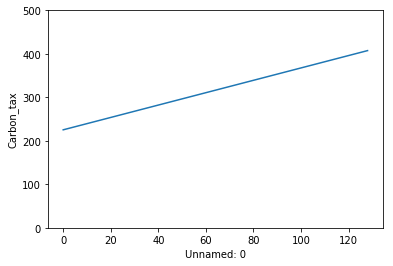

highest_data


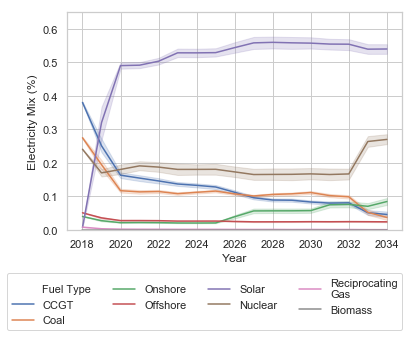

In [20]:
plot_multiple_electricity_mixes("highest_data")

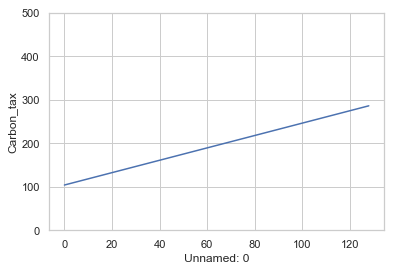

lowest_data


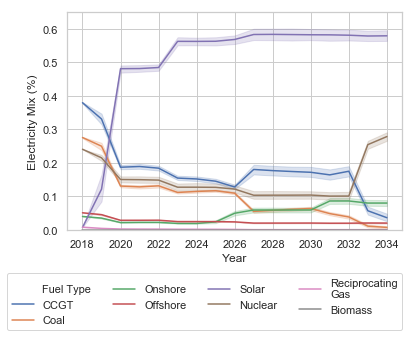

In [21]:
plot_multiple_electricity_mixes("lowest_data")

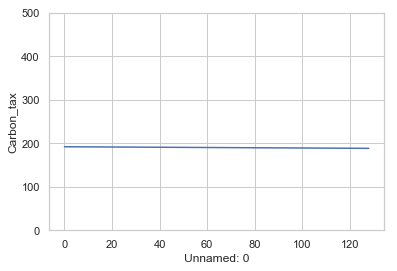

flat_data


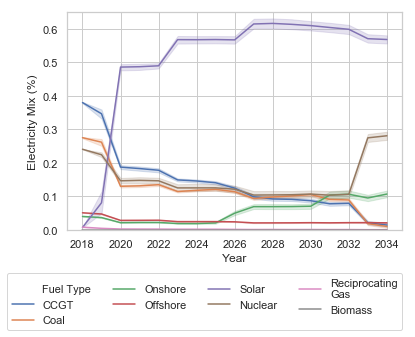

In [22]:
plot_multiple_electricity_mixes("flat_data")

In [23]:
def plot_facetgrid_electricity_mixes(folders):
    all_dat = []
    for folder in folders:
        path = "/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/electricity_mix_bounds/{}/".format(folder)
        all_files = glob.glob(path + "/*.csv")
        results = []


        for i, filename in enumerate(all_files):
            result = pd.read_csv(filename, index_col=None, header=0)
#             if i == 1:
#                 sns.lineplot(data=result[::8], x='Unnamed: 0', y='Carbon_tax')
#                 plt.ylim([0,500])
#                 plt.show()
            per_year_dat = get_projection_difference_sum(result)
            results.append(per_year_dat)


        one_df = pd.concat(results)

        one_df = one_df.replace({'variable' : { 'beis_projections' : 'BEIS', 'simulated_perc' : 'ElecSim'}})
        one_df = one_df.replace({'fuel_type' : { 'Natural_gas' : 'Gas', 'coal' : 'Coal', 'nuclear':'Nuclear', "onshore":"Onshore", "offshore":"Offshore","solar":"Solar","biomass":"Biomass","ccgt":"CCGT","recip_gas":"Reciprocating\nGas"}})
        one_df = one_df.rename(columns={'fuel_type':"Fuel Type:"})
        one_df['Policy'] = folder.split("_")[0].capitalize()
        all_dat.append(one_df)
        
    all_dat_df = pd.concat(all_dat)
    print(all_dat_df.head())
    return all_dat_df


#     plt.savefig("/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/figures/results/best_electricity_mixes/{}_mix.pdf".format(folder), dpi=1000, bbox_inches='tight')



In [24]:
all_dat_df = plot_facetgrid_electricity_mixes(['highest_data','lowest_data','flat_data'])

   year Fuel Type:       actual  simulated_perc   Policy
0  2018       CCGT  9449.816041        0.354556  Highest
1  2019       CCGT  8364.627870        0.196353  Highest
2  2020       CCGT  8013.445781        0.201243  Highest
3  2021       CCGT  7606.788445        0.190299  Highest
4  2022       CCGT  7180.636548        0.167370  Highest


In [25]:
len(all_dat_df)

36720

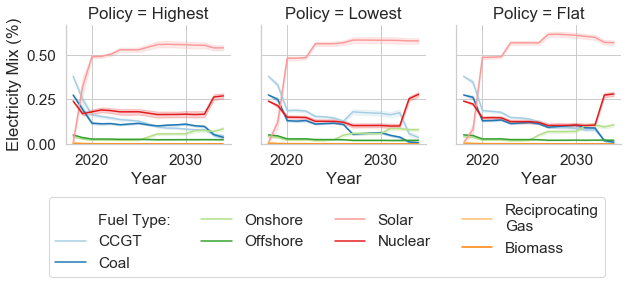

In [33]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
g = sns.FacetGrid(all_dat_df, col="Policy")
g = (g.map(sns.lineplot, 'year', 'simulated_perc','Fuel Type:',palette=sns.color_palette("Paired", n_colors=8)))
g.set(xlabel='Year', ylabel='Electricity Mix (%)')
#     # lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
lgd = plt.legend(bbox_to_anchor=(0.9,-0.45), borderaxespad=0., ncol=4)
plt.ylim(0,0.67)
plt.savefig('/Users/b1017579/Documents/PhD/Papers/6-carbon-optimiser/acmart-master/samples/figures/results/best_electricity_mixes_facet.pdf', dpi=1000, bbox_inches='tight')

